# Google Cloud Vision Example

First make sure you set up your google account with a [Cloud Vision Project](https://cloud.google.com/vision/docs/getting-started##set_up_your_project).  Then you need to enter billing details (to verify you are human) and set up credentials.  This will download a `.json` file.

Before you work in this notebook, you have to do this to let python know about your [application default credentials](https://cloud.google.com/vision/docs/getting-started#adc).  So put the `.json` file in this folder (but do not commit it into git!).  Then `export GOOGLE_APPLICATION_CREDENTIALS=<path to your json file>`.

This code is based on [Google's face detection tutorial](https://cloud.google.com/vision/docs/face-tutorial).

## Requirements
```
google-api-python-client==1.5.0
Pillow==3.1.1
```

In [27]:
import base64
import os

from googleapiclient import discovery
# Note: oauth2client is now deprecated. No more features will be added to the libraries and the core team is turning down support. We recommend you use google-auth and oauthlib. For more details on the deprecation, see oauth2client deprecation.
from oauth2client.client import GoogleCredentials

In [22]:
# Set up a connection to the Google service
DISCOVERY_URL='https://{api}.googleapis.com/$discovery/rest?version={apiVersion}'
# https://cloud.google.com/sdk/gcloud/reference/auth/application-default/login
# env var GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/sec/gcp-service1.json'
credentials = GoogleCredentials.get_application_default()
service = discovery.build('vision', 'v1', credentials=credentials, discoveryServiceUrl=DISCOVERY_URL)

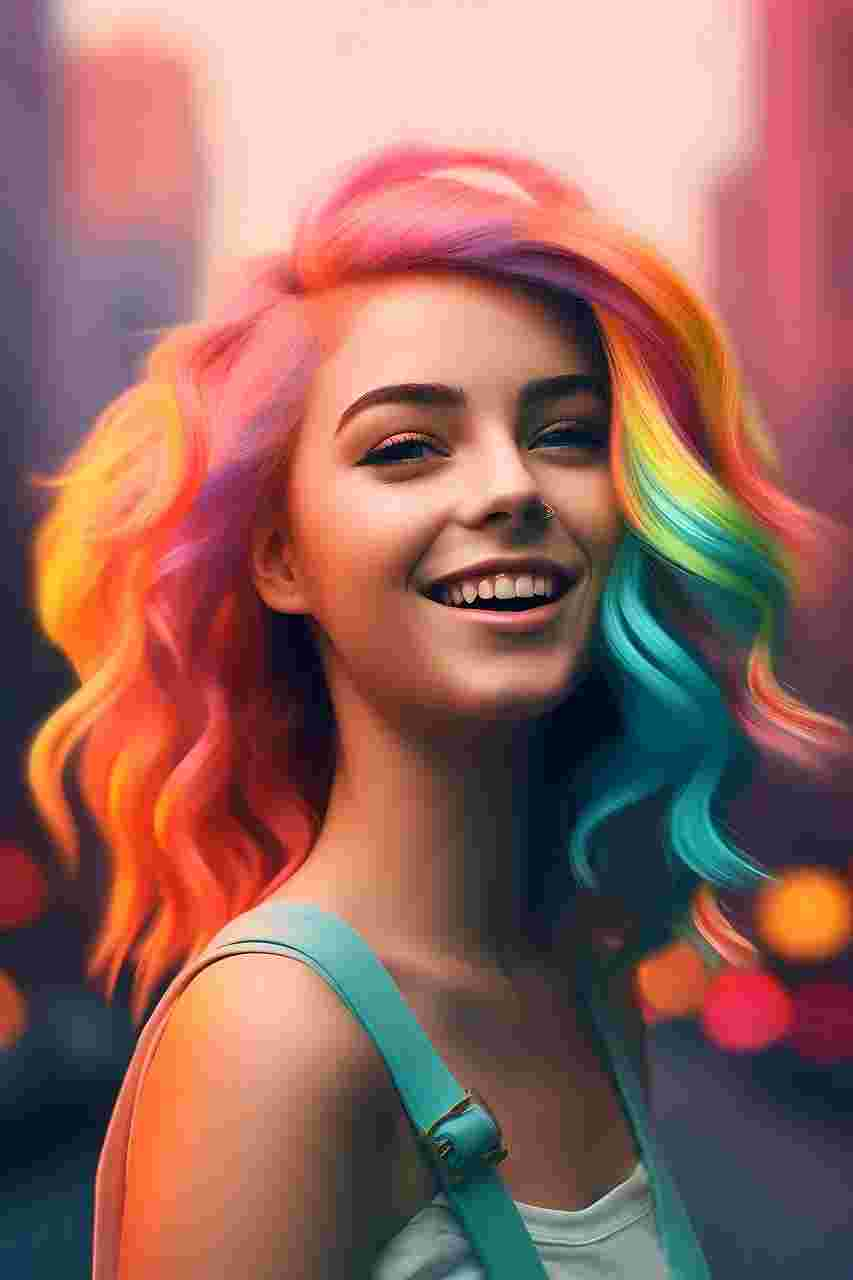

In [23]:
# load the input images
input_filename = "ai-generated-foto.jpg"

# OLD (Deprecated)
# image = open(input_filename,'rb')
# image_content = image.read()

#NEW
# Read the image file and base64 encode it
with open(input_filename, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read())

    
from IPython.display import Image
Image(input_filename)

In [28]:
# fire off request for face detection from Google
# https://cloud.google.com/vision/docs/reference/rest/v1/images/annotate?apix=true
batch_request = [{
    'image': {
        'content': encoded_image.decode("utf-8")
        },
    'features': [{
        'type': 'FACE_DETECTION',
        'maxResults': 4,
        }]
    }]
request = service.images().annotate(body={
    'requests': batch_request,
    })
response = request.execute()
print('Found %s face%s' % (len(response['responses']), '' if len(response['responses']) == 1 else 's'))

Found 1 face


In [29]:
#print response
# print out emotions for each one
for result in response['responses']:
    for annotation in result['faceAnnotations']:
        for emotion in ['joy','sorrow','surprise','anger']:
            print("%s: %s" % (emotion, annotation[emotion+'Likelihood']))
        

joy: VERY_LIKELY
sorrow: VERY_UNLIKELY
surprise: VERY_UNLIKELY
anger: VERY_UNLIKELY
